# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Wayan Devi Pratiwi
- **Email:** pratiwidevii061@gmail.com
- **ID Dicoding:** devipratiwii

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren bulanan penggunaan sepeda dari tahun ke tahun?
2. Bagaimana pengaruh cuaca terhadap penggunaan sepeda?
3. Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?
4.  Apa proporsi penyewaan sepeda berdasarkan tipe pengguna (casual vs registered)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Packages/library yang digunakan untuk analisis data yaitu:
- `numPy (np)`: Untuk komputasi numerik dan operasi array
- `pandas (pd)1`: Untuk manipulasi dan analisis data
- `matplotlib (plt)`: Untuk membuat grafik dasar
- `seaborn (sns)`: Untuk visualisasi statistik yang lebih menarik dan mudah digunakan.

## Data Wrangling

### Gathering Data

In [2]:
# Membaca file csv "day.csv" dan menampilkan 5 baris pertama dari dataset
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- `pd.read_csv("day.csv")`: Memuat data dari file CSV ke dalam DataFrame Pandas, memudahkan manipulasi dan analisis data.
- `day_df.head()`: Menampilkan 5 baris pertama dari dataset, memberikan gambaran awal tentang struktur dan isi data dalam "day.csv".

In [3]:
# Membaca file csv "hour.csv" dan menampilkan beberapa baris pertama dari dataset
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- `pd.read_csv("hour.csv")`: Memuat data dari file CSV ke dalam DataFrame Pandas
- `hour_df.head()`: Menampilkan 5 baris pertama dari dataset, memberikan gambaran awal tentang struktur, kolom, dan lainnya yang terdapat dalam "hour.csv", yang berfokus pada data penyewaan sepeda per jam.

### Assessing Data

**day_df**

In [4]:
# Menampilkan informasi umum tentang DataFrame 'day_df'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat 731 entri dalam DataFrame, yang menunjukkan bahwa data mencakup penyewaan sepeda untuk 731 hari.
- DataFrame memiliki 16 kolom, yang masing-masing menyimpan informasi berbeda tentang penyewaan sepeda.
- Tipe data bervariasi, termasuk:
`int64`: 11 kolom, `float64`: 4 kolom, `object`: 1 kolom
- Setiap kolom memiliki jumlah nilai `non-null`, yang menunjukkan bahwa tidak ada nilai kosong
- Ada satu kolom dengan tipe data yang kurang tepat sesuai dengan hasil di atas. Kolom yang perlu diperbaiki adalah: `dteday` dengan tipe data yang benar adalah `datetime`.

In [5]:
# Menghitung jumlah nilai yang hilang dalam setiap kolom di DataFrame 'day_df'
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Berdasarkan hasil di atas, tabel day_df tidak terdapat missing values.

In [6]:
# Menghitung jumlah baris duplikat dalam DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada entri duplikat dalam DataFrame `day_df`, yang menunjukkan bahwa setiap baris dalam dataset adalah unik.

In [7]:
# Mengecek nilai statistik kolom numerik di 'day_df'
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Statistik deskriptif dari kolom numerik dalam DataFrame `day_df` menunjukkan rentang nilai, rata-rata, dan deviasi standar yang bervariasi

**hour_df**

In [8]:
# Menampilkan informasi umum tentang DataFrame 'hour_df'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat 17,379 entri dalam DataFrame `hour_df`, menunjukkan bahwa data mencakup penyewaan sepeda pada setiap jam selama periode tertentu.
- Terdapat 17 kolom
- DataFrame ini terdiri dari 12 kolom bertipe `int64`, 4 kolom bertipe `float64`, dan 1 kolom bertipe `object`.
- Semua kolom memiliki 17,379 nilai non-null, menunjukkan bahwa tidak ada data yang hilang dalam dataset ini.
- Ada satu kolom dengan tipe data yang kurang tepat sesuai dengan hasil di atas. Kolom yang perlu diperbaiki adalah: `dteday` dengan tipe data yang benar adalah `datetime`.

In [9]:
# Menghitung jumlah nilai yang hilang dalam setiap kolom di DataFrame 'hour_df'
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Berdasarkan hasil di atas, tabel hour_df tidak terdapat missing values.

In [10]:
# Menghitung jumlah baris duplikat dalam DataFrame 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada entri duplikat dalam DataFrame hour_df, yang menunjukkan bahwa setiap baris dalam dataset adalah unik.

In [11]:
# Mengecek nilai  statistik kolom numerik di 'hour_df'
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Statistik deskriptif dari kolom numerik dalam DataFrame `hour_df` menunjukkan rentang nilai, rata-rata, dan deviasi standar yang bervariasi

### Cleaning Data

In [12]:
# Menghapus kolom 'instant' dari day_df dan hour_df
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [13]:
# Mengonversi kolom 'dteday' menjadi tipe datetime di day_df dan hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [15]:
# Mengonversi tipe data integer menjadi kategori pada beberapa kolom 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit'
kolom_kategori = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for kolom in kolom_kategori:
    day_df[kolom] = day_df[kolom].astype("category")
    hour_df[kolom] = hour_df[kolom].astype("category")

# Menampilkan tipe data yang telah diperbarui untuk memastikan perubahan
print(day_df.dtypes[kolom_kategori])
print(hour_df.dtypes[kolom_kategori])

season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object
season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object


In [16]:
# Menyesuaikan nama kolom di dataset hour_df agar lebih jelas
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [17]:
# Menyesuaikan nama kolom di dataset day_df agar lebih jelas
day_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [18]:
# Mengubah kolom 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].astype('category').cat.rename_categories(month_mapping)
hour_df['month'] = hour_df['month'].astype('category').cat.rename_categories(month_mapping)

# Mengubah kolom 'weekday' menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)
hour_df['weekday'] = hour_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)

# Mengubah nilai pada kolom 'year' menjadi: 0:2011, 1:2012
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].astype('category').cat.rename_categories(year_mapping)
hour_df['year'] = hour_df['year'].astype('category').cat.rename_categories(year_mapping)

# Mengubah kolom 'season' menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].astype('category').cat.rename_categories(season_mapping)
hour_df['season'] = hour_df['season'].astype('category').cat.rename_categories(season_mapping)

In [19]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

# Menampilkan 5 baris pertama dari DataFrame 'hour_df' untuk melihat perubahan
print(hour_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0                 2  0.344167  0.363625  0.805833   0.160446     331   
1                 2  0.363478  0.353739  0.696087   0.248539     131   
2                 1  0.196364  0.189405  0.437273   0.248309     120   
3                 1  0.200000  0.212122  0.590435   0.160296     108   
4                 1  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  
      dteday  season  year

In [20]:
# Mengubah kolom 'weather_situation' menjadi: 1:Clear, 2:Misty, 3:LightRain/Snow, 4:HeavyRain/Snow
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'LightRain/Snow', 4: 'HeavyRain/Snow'}

# Pastikan kolom 'weather_situation' adalah kategori sebelum melakukan rename_categories
day_df['weather_situation'] = day_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)

In [21]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0             Misty  0.344167  0.363625  0.805833   0.160446     331   
1             Misty  0.363478  0.353739  0.696087   0.248539     131   
2             Clear  0.196364  0.189405  0.437273   0.248309     120   
3             Clear  0.200000  0.212122  0.590435   0.160296     108   
4             Clear  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  


**Pada cleaning data di atas telah dilakukan:**

- Menghapus kolom instant
- Tipe data kolom dteday telah berhasil diubah menjadi datetime.
- Tipe data int pada kolom season, mnth, holiday, weekday, workingday, dan weathersit sekarang telah beralih menjadi category.
- Perubahan nama pada beberapa kolom agar lebih mudah dibaca

## Exploratory Data Analysis (EDA)

In [75]:
# Mengecek nilai statistik kolom numerik di 'day_df'
day_df.describe()

,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan data di atas, sebagian besar penggunaan sepeda dilakukan pada rata-rata temperatur yang nyaman (0,495). Penggunaan lebih tinggi pada kelembaban sedang (rata-rata 0,628) dan kecepatan angin rendah (rata-rata 0,19). Sebagian besar penyewa adalah pengguna terdaftar dengan rata-rata 3656 per hari, dibandingkan pengguna kasual yang hanya 848. Total penyewaan berkisar antara 22 hingga 8714 sepeda per hari, dengan rata-rata 4504.

In [22]:
# Mengelompokkan 'weather_situation' dan menghitung agregat 'count'
result = day_df.groupby(by='weather_situation', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

print(result)

                  count                           
                    max  min         mean      sum
weather_situation                                 
Clear              8714  431  4876.786177  2257952
Misty              8362  605  4035.862348   996858
LightRain/Snow     4639   22  1803.285714    37869


Berdasarkan hasil di atas menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada cuaca cerah (clear) dengan rata-rata 4.876 penyewaan per hari dan total 2.257.952 penyewaan. Pada cuaca berkabut (misty), rata-rata turun menjadi 4.035, sedangkan hujan ringan atau salju (light rain/snow) memiliki rata-rata terendah, 1.803 penyewaan. Sehingga, penyewaan sepeda lebih tinggi saat cuaca baik dan menurun saat cuaca memburuk.

In [23]:
# Mengelompokkan 'weekday' dan menghitung agregat 'count'
result = day_df.groupby(by='weekday', observed=True).agg({
    'count': ['max', 'min', 'mean']
})

print(result)

          count                   
            max   min         mean
weekday                           
Sunday     8227   605  4228.828571
Monday     7525    22  4338.123810
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462
Thursday   7804   431  4667.259615
Friday     8362  1167  4690.288462
Saturday   8714   627  4550.542857


Berdasarkan hasil di atas, penyewaan sepeda tertinggi terjadi pada hari Sabtu (maksimum 8.714), sementara penyewaan terendah terjadi pada hari Senin (minimum 22). Rata-rata penyewaan tertinggi terjadi pada hari Jumat (4.690), sedangkan rata-rata terendah pada hari Minggu (4.228).

In [24]:
# Menghitung distribusi jumlah penyewaan sepeda
univariate_distribution = day_df['count'].describe()
print("Distribusi Jumlah Penyewaan Sepeda:")
print(univariate_distribution)

Distribusi Jumlah Penyewaan Sepeda:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64


Ringkasan statistik dari jumlah penyewaan sepeda dalam dataset `day_df` sebagai berikut:
- `Count`: Ada 731 entri yang dihitung dalam kolom `count`, menunjukkan jumlah hari yang dianalisis.
- `Mean` (Rata-rata): Rata-rata jumlah penyewaan sepeda per hari adalah sekitar 4504.
- `std` Standard Deviation (Standar Deviasi): Standar deviasi sebesar 1937 menunjukkan bahwa terdapat variasi yang signifikan dalam jumlah penyewaan sepeda per hari.
- `Min` (Minimum): Jumlah penyewaan terendah adalah 22, yang menunjukkan bahwa ada hari-hari di mana sangat sedikit sepeda yang disewa.

- `25%` (Kuartil Pertama): 25% dari hari-hari memiliki jumlah penyewaan sepeda di bawah 3152. Ini menunjukkan bahwa pada sebagian kecil hari, penyewaan sepeda cenderung rendah.
- `50%` (Median): Median jumlah penyewaan adalah 4548, yang berarti setengah dari hari-hari memiliki penyewaan sepeda di bawah angka ini. Ini menunjukkan bahwa distribusi mungkin sedikit miring ke kanan (positively skewed).
- `75%` (Kuartil Ketiga): 75% dari hari-hari memiliki jumlah penyewaan di bawah 5956. Ini memberi gambaran bahwa penyewaan cenderung meningkat pada sebagian besar hari.
- `Max` (Maksimum): Jumlah penyewaan tertinggi yang tercatat adalah 8714, menunjukkan adanya hari-hari dengan permintaan yang sangat tinggi.

In [26]:
# Menghitung total penyewaan sepeda setiap bulan
monthly_rentals = day_df.groupby('month', observed=True)['count'].agg(['sum']).reset_index()
print("\nTotal Penyewaan Sepeda per Bulan:")
print(monthly_rentals)


Total Penyewaan Sepeda per Bulan:
   month     sum
0    Jan  134933
1    Feb  151352
2    Mar  228920
3    Apr  269094
4    May  331686
5    Jun  346342
6    Jul  344948
7    Aug  351194
8    Sep  345991
9    Oct  322352
10   Nov  254831
11   Dec  211036


Hasil di atas menunjukkan total penyewaan sepeda per bulan. Berikut adalah ringkasan dari data tersebut:
- Bulan dengan Penyewaan Tertinggi: Agustus (351.194) mencatat jumlah penyewaan tertinggi.
- Bulan dengan Penyewaan Terendah: Januari (134.933) mencatat jumlah penyewaan terendah.
- Tren Umum: Terdapat tren peningkatan penyewaan sepeda dari Januari hingga Juli, dengan puncaknya di Agustus, sebelum mengalami penurunan pada bulan September dan Oktober, dan kemudian kembali turun di bulan November dan Desember.

In [29]:
# Menghitung total penyewaan sepeda berdasarkan musim
season_distribution = day_df.groupby('season', observed=True)['count'].agg(['sum', 'mean']).reset_index()
print("\nDistribusi Penyewaan Sepeda berdasarkan Musim:")
print(season_distribution)


Distribusi Penyewaan Sepeda berdasarkan Musim:
   season      sum         mean
0  Spring   471348  2604.132597
1  Summer   918589  4992.331522
2    Fall  1061129  5644.303191
3  Winter   841613  4728.162921


Hasil distribusi penyewaan sepeda berdasarkan musim adalah sebagai berikut:
- Spring: Total penyewaan sepeda mencapai 471.348 dengan rata-rata penyewaan per hari sekitar 2.604.
- Summer: Total penyewaan tertinggi dengan 918.589 dan rata-rata penyewaan per hari 4.992.
- Fall: Total penyewaan mencapai 1.061.129, dengan rata-rata penyewaan per hari 5.644, yang merupakan yang tertinggi di antara semua musim.
- Winter: Total penyewaan sebanyak 841.613 dan rata-rata penyewaan per hari 4.728.

Dari hasil ini, dapat disimpulkan bahwa musim Fall memiliki total penyewaan tertinggi, diikuti oleh Summer, sementara Spring memiliki jumlah penyewaan terendah. Rata-rata penyewaan per hari juga menunjukkan tren serupa, dengan Fall dan Summer menunjukkan angka yang lebih tinggi dibandingkan dengan Spring dan Winter.

In [30]:
# Menghitung total penyewaan sepeda berdasarkan tahun
yearly_rentals = day_df.groupby('year', observed=True)['count'].agg(['sum']).reset_index()
print("\nTotal Penyewaan Sepeda berdasarkan Tahun:")
print(yearly_rentals)


Total Penyewaan Sepeda berdasarkan Tahun:
   year      sum
0  2011  1243103
1  2012  2049576


Hasil total penyewaan sepeda berdasarkan tahun menunjukkan bahwa:
- Pada tahun 2011, total penyewaan sepeda mencapai 1,243,103.
- Pada tahun 2012, jumlah penyewaan meningkat secara signifikan menjadi 2,049,576.

Hal ini menunjukkan pertumbuhan yang positif dalam penggunaan sepeda dari tahun 2011 ke tahun 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bulanan penggunaan sepeda dari tahun ke tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


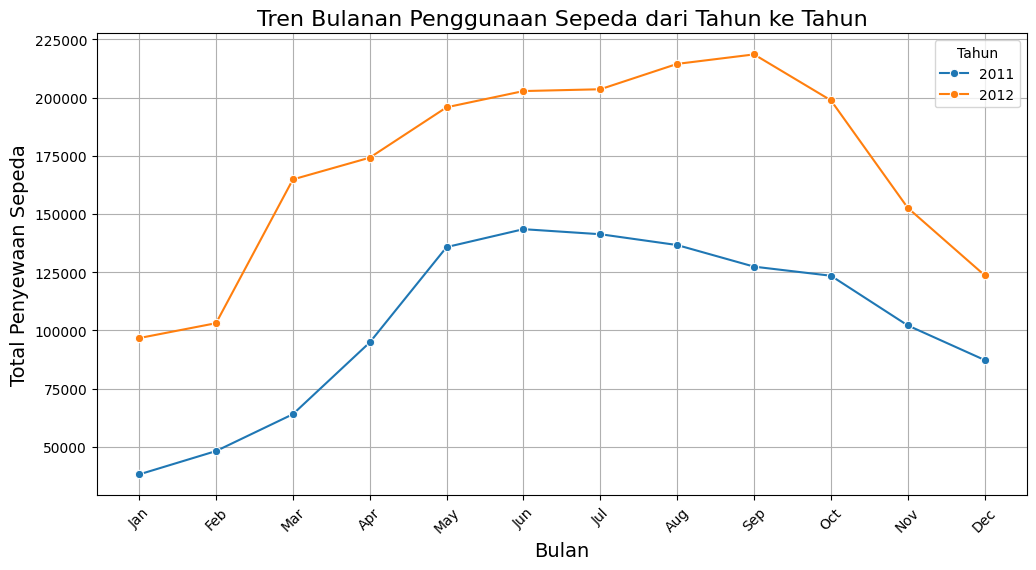

In [34]:
# Menghitung total penyewaan sepeda per bulan untuk setiap tahun
monthly_trend = day_df.groupby(['year', 'month'], observed=True)['count'].sum().reset_index()

# Mengatur urutan bulan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='count', hue='year', marker='o')

# Menambahkan judul dan label
plt.title('Tren Bulanan Penggunaan Sepeda dari Tahun ke Tahun', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.grid()
plt.show()



Hasil visualisasi tren bulanan penggunaan sepeda dari tahun ke tahun:
- Sumbu X mewakili bulan dalam tahun (dari Januari hingga Desember).
- Sumbu Y menunjukkan total penyewaan sepeda, yang diukur dalam jumlah penyewaan.
- Garis Biru yaitu tahun 2011:Menunjukkan pola penggunaan yang meningkat secara bertahap dari Januari hingga Mei, dengan puncak pada bulan Juni, lalu menurun hingga akhir tahun.
- Garis Oranye tahun 2012: Menunjukkan tren yang serupa, tetapi dengan total penyewaan yang lebih tinggi di hampir setiap bulan dibandingkan tahun 2011.
- Kedua tahun menunjukkan pola musiman yang mirip, di mana penggunaan sepeda lebih tinggi selama bulan-bulan musim panas (Mei hingga Agustus) dan lebih rendah pada bulan-bulan musim dingin (Desember hingga Februari).
- Meskipun terdapat tren serupa, terlihat bahwa penggunaan sepeda secara keseluruhan lebih tinggi pada tahun 2012 dibandingkan dengan 2011, terutama pada bulan-bulan puncak.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penggunaan sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


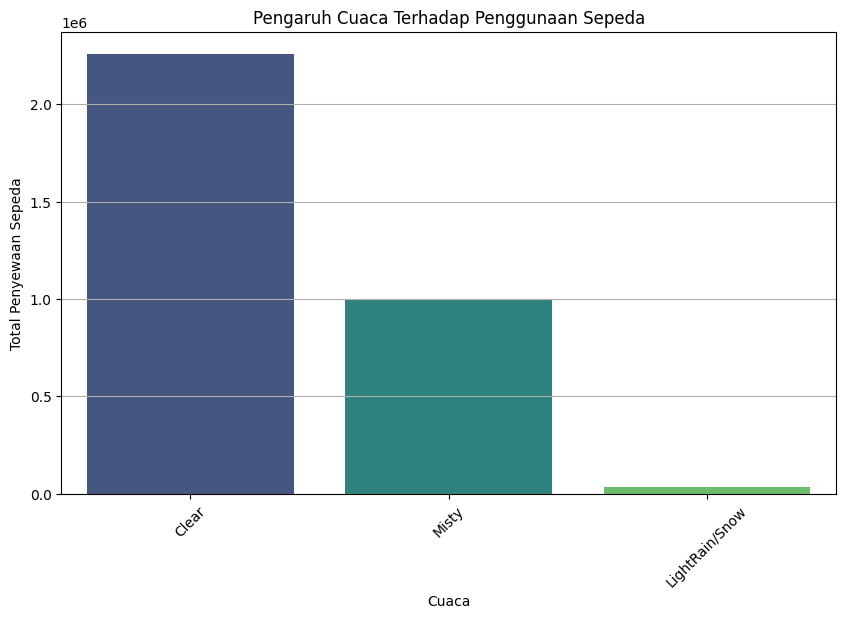

In [39]:
# Menghitung total penyewaan sepeda berdasarkan cuaca
weather_rentals = day_df.groupby('weather_situation', observed=True)['count'].agg(['sum', 'mean']).reset_index()

# Visualisasi pengaruh cuaca terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, x='weather_situation', y='sum', hue='weather_situation', palette='viridis', legend=False)
plt.title('Pengaruh Cuaca Terhadap Penggunaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Hasil visualisasi mengenai pengaruh cuaca terhadap penggunaan sepeda adalah sebagai berikut:
- Kondisi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Pengguna cenderung lebih banyak menyewa sepeda saat cuaca cerah dibandingkan dengan kondisi cuaca yang buruk seperti hujan atau salju.
- Data ini mengindikasikan bahwa pengguna lebih memilih untuk bersepeda dalam cuaca yang nyaman, seperti saat cerah dan hangat. Sebaliknya, cuaca buruk mengurangi minat pengguna untuk menyewa sepeda.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


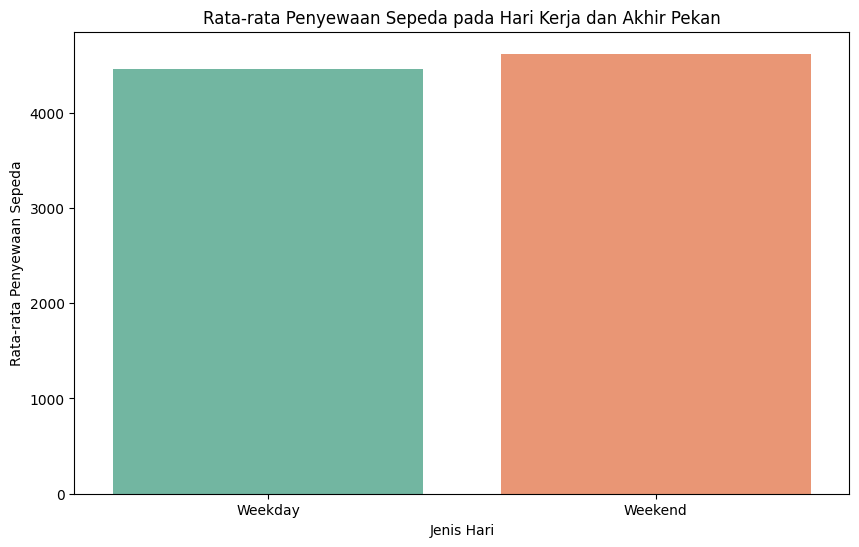

In [49]:
# Menambahkan kolom untuk menentukan apakah hari tersebut adalah hari kerja atau akhir pekan
day_df['day_type'] = day_df['weekday'].cat.codes.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Menghitung rata-rata penyewaan sepeda berdasarkan jenis hari
day_type_rentals = day_df.groupby('day_type')['count'].agg(['mean']).reset_index()

# Visualisasi rata-rata penyewaan sepeda berdasarkan jenis hari
plt.figure(figsize=(10, 6))
sns.barplot(data=day_type_rentals, x='day_type', y='mean', hue='day_type', palette='Set2', legend=False)
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.show()

Hasil visualisasi rata-rata penyewaan sepeda pada hari kerja dan akhir pekan menunjukkan pola penggunaan yang berbeda antara kedua jenis hari tersebut.
- Rata-rata penyewaan sepeda pada hari kerja dan akhir pekan memperlihatkan bahwa perilaku pengguna sepeda bervariasi tergantung pada jenis hari. Ini memberikan wawasan penting tentang kapan dan mengapa orang memilih untuk menggunakan sepeda.
- Hari Kerja vs. Akhir Pekan: Batang untuk akhir pekan lebih tinggi, ini menunjukkan adanya minat yang lebih besar untuk bersepeda di waktu luang,  Sebaliknya, batang untuk hari kerja menunjukkan ketergantungan pada sepeda sebagai sarana transportasi.

### Pertanyaan 4: Apa proporsi penyewaan sepeda berdasarkan tipe pengguna (casual vs registered)?

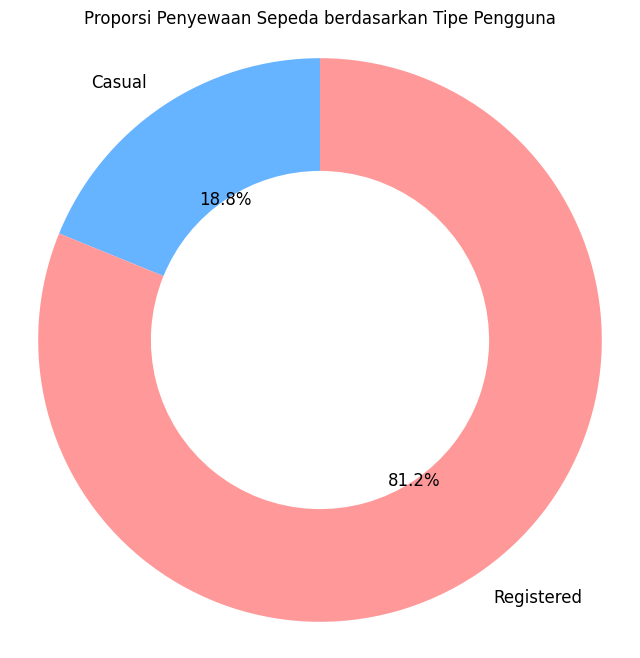

In [71]:
# Menghitung proporsi penyewaan berdasarkan tipe pengguna
user_type_counts = day_df[['casual', 'registered']].sum()

# Membuat pie chart berbentuk donat dengan persentase yang lebih rapi
plt.figure(figsize=(8, 8))
plt.pie(user_type_counts, labels=['Casual', 'Registered'],
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',  # Format persentase lebih rapi
        colors=['#66b3ff', '#ff9999'], startangle=90,
        wedgeprops={'width': 0.4}, textprops={'fontsize': 12})  # Ukuran font lebih rapi
plt.title('Proporsi Penyewaan Sepeda berdasarkan Tipe Pengguna')
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.show()

Berdasarkan hasil visualisasi di atas didapatkan bahwa bahwa 81.2% penyewaan sepeda dilakukan oleh pengguna terdaftar (registered), sementara hanya 18.8% dilakukan oleh pengguna casual. Hal ini menunjukkan bahwa pengguna terdaftar merupakan mayoritas, kemungkinan karena mereka menggunakan sepeda secara rutin, sementara pengguna casual lebih jarang menyewa sepeda, mungkin hanya untuk tujuan rekreasi atau penggunaan sesekali.

## Conclusion

**Conclution pertanyaan 1: Bagaimana tren bulanan penggunaan sepeda dari tahun ke tahun?**

Hasil visualisasi menunjukkan adanya pola musiman yang jelas dalam penggunaan sepeda antara tahun 2011 dan 2012. Pada kedua tahun tersebut, penggunaan sepeda memuncak selama bulan-bulan musim panas, khususnya dari Mei hingga Agustus, dan mencapai titik terendah pada bulan-bulan musim dingin seperti Desember, Januari, dan Februari.
- Tahun 2011: Jumlah penyewaan sepeda mengalami peningkatan bertahap dari Januari hingga Mei, dengan puncaknya di bulan Juni. Setelah bulan Juni, terjadi penurunan penggunaan sepeda yang terus berlanjut hingga akhir tahun.
- Tahun 2012: Tren yang serupa terlihat, tetapi dengan jumlah penyewaan yang lebih tinggi dibandingkan tahun 2011. Pada bulan-bulan puncak (Mei hingga Agustus), jumlah penyewaan sepeda meningkat secara signifikan dibandingkan dengan tahun sebelumnya.


**Conclution pertanyaan 2: Bagaimana pengaruh cuaca terhadap penggunaan sepeda?**

Hasil visualisasi menunjukkan bagaimana kondisi cuaca mempengaruhi tingkat penyewaan sepeda. Data tersebut menunjukkan hubungan yang kuat antara kondisi cuaca yang lebih baik dan peningkatan penyewaan sepeda.
- Cuaca cerah atau sebagian berawan: Penyewaan sepeda sangat tinggi dalam kondisi ini, menandakan bahwa pengguna sepeda lebih suka bersepeda saat kondisi cuaca nyaman dan tidak terlalu ekstrem.
- Cuaca buruk (hujan, salju, atau kabut): Dalam kondisi cuaca yang kurang mendukung, seperti hujan atau salju, jumlah penyewaan sepeda mengalami penurunan signifikan. Ini menunjukkan bahwa kondisi cuaca buruk cenderung menghalangi pengguna sepeda, mungkin karena alasan keselamatan atau kenyamanan.

Cuaca adalah faktor kunci dalam menentukan jumlah penyewaan sepeda. Pengguna lebih memilih menyewa sepeda saat cuaca baik, dan menghindari bersepeda saat cuaca buruk.


**Conclution pertanyaan 3: Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?**

Dari hasil visualisasi, terlihat pola penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan:
- Hari kerja: Penyewaan sepeda cenderung lebih rendah dibandingkan akhir pekan, meskipun masih signifikan. Ini menunjukkan bahwa pada hari kerja, sepeda lebih sering digunakan sebagai sarana transportasi untuk keperluan fungsional, seperti perjalanan ke tempat kerja atau sekolah.
- Akhir pekan: Penyewaan sepeda lebih tinggi, yang menunjukkan bahwa pada akhir pekan, orang lebih sering menyewa sepeda untuk rekreasi atau kegiatan di luar ruangan. Ini menandakan bahwa pengguna sepeda lebih suka memanfaatkan waktu luang di akhir pekan untuk bersepeda.

Kesimpulan utama adalah bahwa ada perbedaan yang jelas dalam penggunaan sepeda pada hari kerja dan akhir pekan. Pada hari kerja, sepeda lebih banyak digunakan sebagai transportasi untuk aktivitas sehari-hari, sedangkan pada akhir pekan, penggunaan sepeda lebih bersifat rekreasi.


**Conclution pertanyaan 4: Apa proporsi penyewaan sepeda berdasarkan tipe pengguna (casual vs registered)?**

Berdasarkan hasil visualisasi menampilkan proporsi penyewaan sepeda berdasarkan tipe pengguna, hasilnya menunjukkan bahwa terdapat dua kategori utama pengguna sepeda: casual (pengguna santai) dan registered (pengguna terdaftar). Dari hasil analisis, didapatkan persentase sebagai berikut:
- Casual (18.8%): Pengguna yang tidak terdaftar dalam sistem, umumnya mereka yang menyewa sepeda sesekali atau untuk keperluan rekreasi. Meskipun ada bagian yang signifikan, hanya sekitar 18.8% dari total penyewaan sepeda dilakukan oleh pengguna tipe ini.
- Registered (81.2%): Pengguna yang terdaftar secara resmi dalam sistem penyewaan sepeda, yang cenderung menggunakan sepeda secara lebih rutin, baik untuk transportasi harian maupun tujuan tertentu. Kelompok ini mendominasi penggunaan sepeda dengan proporsi sebesar 81.2%, menunjukkan bahwa pengguna yang terdaftar lebih banyak melakukan penyewaan dibandingkan pengguna casual.

Visualisasi ini memperlihatkan bahwa mayoritas penyewaan sepeda dilakukan oleh pengguna yang terdaftar. Hal ini bisa disebabkan oleh beberapa faktor, antara lain:
- Penggunaan rutin: Pengguna terdaftar mungkin menggunakan sepeda sebagai bagian dari transportasi harian mereka, seperti untuk berangkat kerja atau sekolah.
- Frekuensi penyewaan: Pengguna casual mungkin hanya menyewa sepeda pada kesempatan tertentu seperti untuk rekreasi, sedangkan pengguna terdaftar lebih cenderung menyewa secara teratur.

In [72]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

all_df.to_csv("main_data.csv", index=False)